# Programing languages for data science
### Statistical learning from data HW1
Umur Can Kaya
090140107

In [27]:
from pytrends.request import TrendReq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
%matplotlib inline

In [28]:
pytrends = TrendReq(hl='en-US', tz=360)

All of the search terms are inside the list ```kw_list``` and I get the google trends data of these terms as a dataframe. Head of the dataframe is below.

In [88]:
kw_list = ["data science", "Python for data science", "R for data science", "c++ for data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df = pytrends.interest_over_time()
df = df.drop(['isPartial'],axis=1)
df.head()

,data science,Python for data science,R for data science,c++ for data science
date,,,,
2004-01-01,0,0,0,94
2004-02-01,0,0,0,100
2004-03-01,0,0,0,99
2004-04-01,0,0,0,97
2004-05-01,0,0,0,94


A quick look into the data:

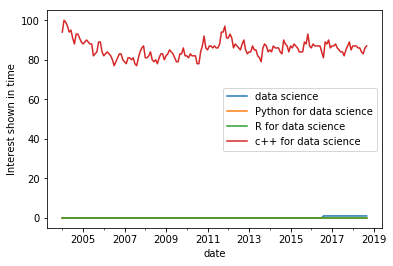

In [86]:
df.plot();plt.ylabel('Interest shown in time');plt.show()

"The numbers show the search interest relative to the highest point in the graph for a given region and time. The value 100 is the most popular of the term. A value of 50 means that the term is as popular as half of it. A value of 0 means that there is not enough data for that term." [from google trends]

Google trends gives the interest of all search terms in the same scale and it only gives integer values. Therefore if a term is searched 100 times less than another term, then the interest of less searched term will appear as 0.

Since I am interested in the correlation between the terms, this will effect my analysis as seen in the correlation matrix below:

In [89]:
df.corr()

,data science,Python for data science,R for data science,c++ for data science
data science,1.000000,NaN,NaN,0.054274
Python for data science,NaN,NaN,NaN,NaN
R for data science,NaN,NaN,NaN,NaN
c++ for data science,0.054274,NaN,NaN,1.000000


NaN values appeard because "c++ for data science" is dominating the interest and causes the loss of information in less interested terms.

A workaround solution would be collecting the data of each column seperately and then concatenating into a final dataframe. This time with more languages.

In [91]:
kw_list = ["data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df_science = pytrends.interest_over_time()

In [92]:
kw_list = ["Python for data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df_p = pytrends.interest_over_time()

In [93]:
kw_list = ["R for data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df_R = pytrends.interest_over_time()

In [94]:
kw_list = ["Julia for data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df_julia = pytrends.interest_over_time()

In [95]:
kw_list = ["MATLAB for data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df_matlab = pytrends.interest_over_time()

In [96]:
kw_list = ["c++ for data science"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
df_cpp = pytrends.interest_over_time()

In [97]:
l = [df_science, df_p, df_R, df_julia, df_matlab, df_cpp]

In [98]:
df = pd.concat(l,axis=1)
df = df.drop(['isPartial'],axis=1)
df.head()

,data science,Python for data science,R for data science,Julia for data science,MATLAB for data science,c++ for data science
date,,,,,,
2004-01-01,16,0,0,0,0,94
2004-02-01,15,0,0,0,0,100
2004-03-01,17,0,0,0,0,99
2004-04-01,16,0,0,0,0,97
2004-05-01,10,0,0,0,0,94


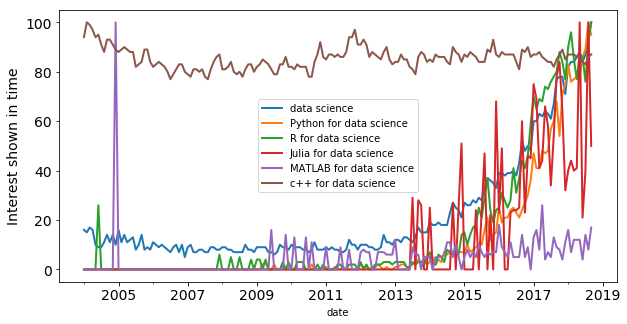

In [115]:
df.plot(figsize=(10,5),fontsize=14,lw=2);plt.ylabel('Interest shown in time',fontsize=14);plt.show()

This looks better.

In [69]:
df.describe()

,data science,Python for data science,R for data science,Julia for data science,MATLAB for data science,c++ for data science
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,22.011299,11.107345,14.666667,10.813559,4.350282,85.446328
std,22.550698,22.681460,26.593887,21.797473,8.809306,4.245144
min,6.000000,0.000000,0.000000,0.000000,0.000000,77.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,83.000000
50%,11.000000,0.000000,2.000000,0.000000,0.000000,86.000000
75%,27.000000,7.000000,14.000000,0.000000,7.000000,88.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


By looking at the plot and the description of the dataframe, it seems that some of the terms deviates a lot. Since I want to see the overall correlation my analysis will effected from these deviations so it will be better if I can smooth them.

A moving average window will be enaugh.

In [112]:
df_smooth = df.rolling(window=7).mean()

In [113]:
df_smooth.describe()

,data science,Python for data science,R for data science,Julia for data science,MATLAB for data science,c++ for data science
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,20.845447,9.894737,13.594820,10.137009,4.297410,85.246449
std,20.729102,20.145167,24.758976,17.879310,4.016844,3.308726
min,7.571429,0.000000,0.000000,0.000000,0.000000,79.428571
25%,8.428571,0.000000,0.571429,0.000000,0.000000,82.500000
50%,10.571429,0.571429,1.714286,0.000000,3.714286,85.571429
75%,24.928571,7.285714,10.071429,13.571429,6.857143,86.857143
max,88.857143,86.142857,86.142857,62.571429,14.285714,95.714286


After windowing standart deviation is decreased. This can also be seen in the plot:

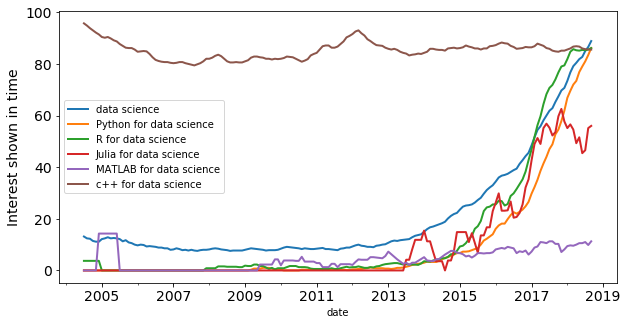

In [114]:
df_smooth.plot(figsize=(10,5),fontsize=14,lw=2);plt.ylabel('Interest shown in time',fontsize=14);plt.show()

Time to see the results, let's look at the correlation matrix.

In [116]:
corr = df_smooth.corr()
corr

,data science,Python for data science,R for data science,Julia for data science,MATLAB for data science,c++ for data science
data science,1.000000,0.981238,0.988760,0.967167,0.663327,0.196068
Python for data science,0.981238,1.000000,0.984222,0.935727,0.597969,0.129234
R for data science,0.988760,0.984222,1.000000,0.972643,0.620991,0.153380
Julia for data science,0.967167,0.935727,0.972643,1.000000,0.635454,0.153913
MATLAB for data science,0.663327,0.597969,0.620991,0.635454,1.000000,0.428204
c++ for data science,0.196068,0.129234,0.153380,0.153913,0.428204,1.000000


These values should be good enaugh but I don't feel comfortable without looking at the scatter matrix.

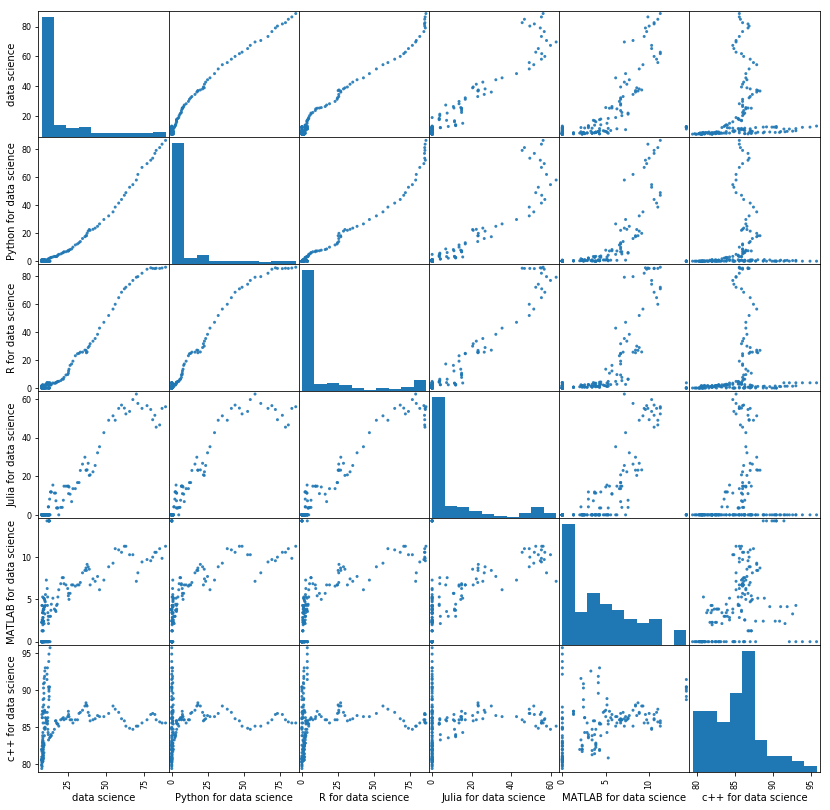

In [111]:
pd.plotting.scatter_matrix(df_smooth,figsize=(14,14),alpha=0.9)
plt.show()

## Results & Discussion

In [118]:
corr["data science"][1:]

Python for data science    0.981238
R for data science         0.988760
Julia for data science     0.967167
MATLAB for data science    0.663327
c++ for data science       0.196068
Name: data science, dtype: float64

As expected Python and R is the most correlated programming languages with data science while Matlab is left far behind them.

What suprises me is that altough its high popularity c++ is bearly correlated at all.

I am also happy to see that Julia, the language that is spesifically designed for scientific computing, is doing very well, almost as good as Python and R.

The effect of windowing on the correlation values should be discussed, since I believe it effects the results a lot.